# Multi-layer Perceptron With Python

In [95]:
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.datasets import load_diabetes
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor

## Creating the neural network

In [4]:
dataset = load_diabetes()
X = pd.DataFrame(dataset.data, columns=dataset.feature_names)
y = dataset.target

In [13]:
X.shape

(442, 10)

In [5]:
X.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

In [114]:
mlp_model = MLPRegressor(hidden_layer_sizes=(20, 10, 5),
                         activation="relu",
                         solver="adam",
                         alpha=1e-5,
                         batch_size=32,
                         # verbose=True,
                         max_iter=500,
                         random_state=42)

mlp_model.fit(X_train, y_train)

MLPRegressor(alpha=1e-05, batch_size=32, hidden_layer_sizes=(20, 10, 5),
             max_iter=500, random_state=42)

In [115]:
y_hat_test = mlp_model.predict(X_test)
r2 = mlp_model.score(X_test, y_test)
mse = mean_squared_error(y_test, y_hat_test)
rmse = mse**0.5
mae = mean_absolute_error(y_test, y_hat_test)

In [116]:
print("Evaluating Model:")
print(f"\tR^2 = {r2:.4f}")
print(f"\tMSE = {mse:.4f}")
print(f"\tRMSE = {rmse:.4f}")
print(f"\tMAE = {mae:.4f}")

Evaluating Model:
	R^2 = 0.4279
	MSE = 3048.8856
	RMSE = 55.2167
	MAE = 42.0299


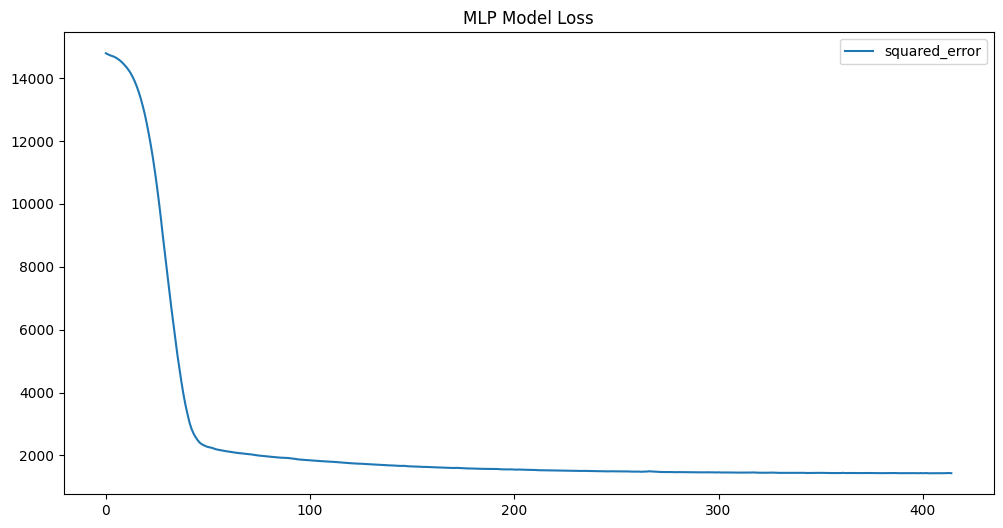

In [117]:
plt.figure(figsize=(12, 6))
plt.title("MLP Model Loss")
plt.plot(mlp_model.loss_curve_, label=f"{mlp_model.loss}")
plt.hlines()
plt.legend()
plt.show()